# Homework5
**Ze Chen**    
**Chunran Yao**


In [1]:
from keras.models import Sequential, Model
from keras.layers import Dense, Activation, Dropout, BatchNormalization, Input, add
from keras import regularizers, Model
from keras.datasets import fashion_mnist
import keras
from sklearn.datasets import load_iris
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedShuffleSplit
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import glob
import os
from keras.layers import Conv2D, MaxPooling2D, Flatten
import matplotlib.pyplot as plt

Using TensorFlow backend.


# Task 1

In [0]:
def make_model(optimizer = 'adam', hidden_size = 32,regularization_strength = 0.01):
  model = Sequential()
  model.add(Dense(hidden_size, activation='relu', input_dim=4,kernel_regularizer=regularizers.l2(regularization_strength)))
  model.add(Dense(hidden_size, activation='relu', kernel_regularizer=regularizers.l2(regularization_strength)))
  model.add(Dense(3, activation='softmax'))
  
  model.compile(optimizer=optimizer,loss="categorical_crossentropy",metrics=['accuracy'])
  return model

In [0]:
clf = KerasClassifier(make_model)

In [0]:
iris_X, iris_y = load_iris(return_X_y=True)
X_train, X_test, y_train,y_test = train_test_split(iris_X,iris_y)

In [0]:
ss = StratifiedShuffleSplit(n_splits=5, test_size=0.25)

In [0]:
param_grid = {'hidden_size': [32, 64, 256],
             'regularization_strength': [0,0.01,0.05,0.1]}
grid = GridSearchCV(clf, param_grid=param_grid, cv=ss)
grid.fit(X_train, y_train,epochs = 10)

Epoch 1/10
84/84 [==============================] - 19s 226ms/step - loss: 1.1945 - acc: 0.3214
Epoch 2/10
84/84 [==============================] - 0s 258us/step - loss: 1.0866 - acc: 0.3690
Epoch 3/10
84/84 [==============================] - 0s 262us/step - loss: 0.9942 - acc: 0.6548
Epoch 4/10
84/84 [==============================] - 0s 245us/step - loss: 0.9199 - acc: 0.6667
Epoch 5/10
84/84 [==============================] - 0s 239us/step - loss: 0.8625 - acc: 0.6667
Epoch 6/10
84/84 [==============================] - 0s 258us/step - loss: 0.8215 - acc: 0.6667
Epoch 7/10
84/84 [==============================] - 0s 252us/step - loss: 0.7873 - acc: 0.6667
Epoch 8/10
84/84 [==============================] - 0s 266us/step - loss: 0.7631 - acc: 0.6667
Epoch 9/10
84/84 [==============================] - 0s 266us/step - loss: 0.7382 - acc: 0.6429
Epoch 10/10
84/84 [==============================] - 0s 255us/step
Epoch 1/10
84/84 [==============================] - 18s 210ms/step - loss: 1.

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=None, test_size=0.25,
            train_size=None),
       error_score='raise-deprecating',
       estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7f066b1b1be0>,
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'hidden_size': [32, 64, 256], 'regularization_strength': [0, 0.01, 0.05, 0.1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [0]:
res = pd.DataFrame(grid.cv_results_)
res.pivot_table(index=["param_hidden_size",'param_regularization_strength'],
                values=['mean_train_score', "mean_test_score"])

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py

mean_test_score  \
param_hidden_size param_regularization_strength                    
32                0.00                                  0.735714   
                  0.01                                  0.735714   
                  0.05                                  0.600000   
                  0.10                                  0.692857   
64                0.00                                  0.914286   
                  0.01                                  0.892857   
                  0.05                                  0.764286   
                  0.10                                  0.692857   
256               0.00                                  0.971429   
                  0.01                                  0.964286   
                  0.05                                  0.950000   
                  0.10                                  0.914286   

                                                 mean_train_score  
param_hidden_size param_regularization_strength                    
32                0.00                                   0.740476  
                  0.01                                   0.733333  
                  0.05                                   0.602381  
                  0.10                                   0.661905  
64                0.00                                   0.883333  
                  0.01                                   0.838095  
                  0.05                                   0.771429  
                  0.10                                   0.685714  
256               0.00                                   0.961905  
                  0.01                                   0.966667  
                  0.05                                   0.923810  
                  0.10                                   0.902381

# Task 2

In [5]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

4423680/4422102 [==============================] - 1s 0us/step


In [0]:
def make_model(drop_out = 0, hidden_size = 32, hidden_layes = 1):
  model = Sequential()
  model.add(Dense(hidden_size, input_dim=784, activation='relu'))
  model.add(Dropout(drop_out))
  for i in range(1, hidden_layes):
    model.add(Dense(hidden_size, activation='relu'))
    model.add(Dropout(drop_out))
  model.add(Dense(10, activation='softmax'))

  model.compile(optimizer='adam',loss="categorical_crossentropy",metrics=['accuracy'])
  return model

## Vanilla Model


In [0]:
vanilla_model = make_model()
history_callback = vanilla_model.fit(X_train, y_train, batch_size=128, epochs=50, verbose=1,validation_split=1/6)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 4s 77us/step - loss: 0.7045 - acc: 0.7660 - val_loss: 0.5054 - val_acc: 0.8231
Epoch 2/50
50000/50000 [==============================] - 1s 26us/step - loss: 0.4648 - acc: 0.8390 - val_loss: 0.4541 - val_acc: 0.8404
Epoch 3/50
50000/50000 [==============================] - 1s 26us/step - loss: 0.4263 - acc: 0.8516 - val_loss: 0.4214 - val_acc: 0.8531
Epoch 4/50
50000/50000 [==============================] - 1s 26us/step - loss: 0.3975 - acc: 0.8620 - val_loss: 0.4068 - val_acc: 0.8588
Epoch 5/50
50000/50000 [==============================] - 1s 26us/step - loss: 0.3823 - acc: 0.8662 - val_loss: 0.4011 - val_acc: 0.8563
Epoch 6/50
50000/50000 [==============================] - 1s 26us/step - loss: 0.3656 - acc: 0.8725 - val_loss: 0.3971 - val_acc: 0.8585
Epoch 7/

In [0]:
vanilla_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                25120     
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


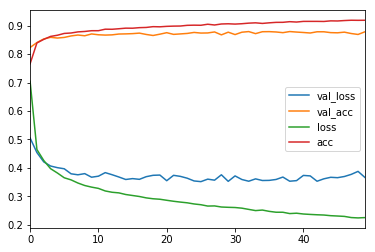

In [0]:
pd.DataFrame(history_callback.history).plot()

## A model using drop-out

In [14]:
drop_out_model = make_model(drop_out=0.5, hidden_size= 1024, hidden_layes= 2)
history_callback = drop_out_model.fit(X_train, y_train, batch_size=128, epochs=50, verbose=1,validation_split=1/6)

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 3s 54us/step - loss: 0.5923 - acc: 0.7856 - val_loss: 0.4191 - val_acc: 0.8435
Epoch 2/50
50000/50000 [==============================] - 2s 38us/step - loss: 0.4509 - acc: 0.8359 - val_loss: 0.4031 - val_acc: 0.8530
Epoch 3/50
50000/50000 [==============================] - 2s 38us/step - loss: 0.4181 - acc: 0.8492 - val_loss: 0.3615 - val_acc: 0.8652
Epoch 4/50
50000/50000 [==============================] - 2s 38us/step - loss: 0.3985 - acc: 0.8535 - val_loss: 0.3637 - val_acc: 0.8691
Epoch 5/50
50000/50000 [==============================] - 2s 38us/step - loss: 0.3898 - acc: 0.8575 - val_loss: 0.3487 - val_acc: 0.8739
Epoch 6/50
50000/50000 [==============================] - 2s 38us/step - loss: 0.3728 - acc: 0.8630 - val_loss: 0.3483 - val_acc: 0.8697
Epoch 7/50
50000/50000 [==============================] - 2s 38us/step - loss: 0.3637 - acc: 0.8666 - val_loss: 0.3338 - val_acc

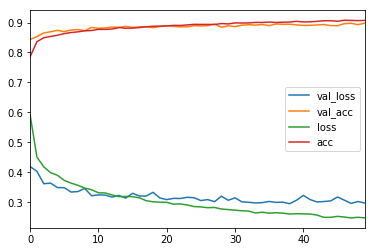

In [15]:
pd.DataFrame(history_callback.history).plot()

In [16]:
drop_out_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 1024)              803840    
_________________________________________________________________
dropout_4 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_20 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dropout_5 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_21 (Dense)             (None, 10)                10250     
Total params: 1,863,690
Trainable params: 1,863,690
Non-trainable params: 0
_________________________________________________________________


## a model using batch normalization and residual connections

In [0]:
inputs = Input(shape=(784,))
h1_1 = Dense(128, activation='relu')(inputs)
h1_2 = BatchNormalization()(h1_1)
h2_1 = Dense(128, activation='relu')(h1_2)
h2_2 = BatchNormalization()(h2_1)
h3_1 = Dense(128, activation='relu')(h2_2)
h3_2 = BatchNormalization()(h3_1)

skip1 = add([h1_2,h3_2])
skip1_bn = BatchNormalization()(skip1)

h4_1 = Dense(128, activation = 'relu')(skip1_bn)
h4_2 = BatchNormalization()(h4_1)

h5_1 = Dense(128, activation = 'relu')(h4_2)
h5_2 = BatchNormalization()(h5_1)

skip2 = add([skip1_bn, h5_2])
skip2_bn = BatchNormalization()(skip2)

h6_1 = Dense(128, activation = 'relu')(skip2_bn)
h6_2 = BatchNormalization()(h6_1)

predictions = Dense(10, activation='softmax')(h6_2)

In [7]:
model = Model(inputs=inputs, outputs=predictions) 
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy']) 
history_callback = model.fit(X_train, y_train, batch_size=128, epochs=50, verbose=1,validation_split=1/6)

Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 10s 200us/step - loss: 0.4924 - acc: 0.8241 - val_loss: 0.4546 - val_acc: 0.8290
Epoch 2/50
50000/50000 [==============================] - 6s 127us/step - loss: 0.3566 - acc: 0.8695 - val_loss: 0.3755 - val_acc: 0.8637
Epoch 3/50
50000/50000 [==============================] - 6s 120us/step - loss: 0.3205 - acc: 0.8809 - val_loss: 0.4132 - val_acc: 0.8445
Epoch 4/50
50000/50000 [==============================] - 6s 113us/step - loss: 0.2944 - acc: 0.8911 - val_loss: 0.3867 - val_acc: 0.8544
Epoch 5/50
50000/50000 [==============================] - 6s 112us/step - loss: 0.2785 - acc: 0.8957 - val_loss: 0.3690 - val_acc: 0.8661
Epoch 6/50
50000/50000 [==============================] - 6s 114us/step - loss: 0.2629 - acc: 0.9028 - val_loss: 0.3555 - val_acc: 0.8674
Epoch 7/50
50000/50000 [==============================] - 6s 113us/step -

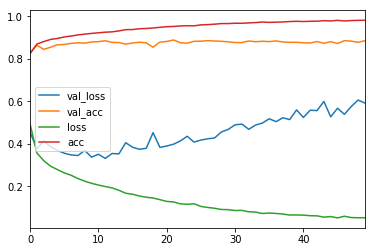

In [8]:
pd.DataFrame(history_callback.history).plot()

In [9]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 784)          0                                            
__________________________________________________________________________________________________
dense_8 (Dense)                 (None, 128)          100480      input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_9 (BatchNor (None, 128)          512         dense_8[0][0]                    
__________________________________________________________________________________________________
dense_9 (Dense)                 (None, 128)          16512       batch_normalization_9[0][0]      
__________________________________________________________________________________________________
batch_norm

# Task 3

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
cd "/content/drive/My Drive/Colab Notebooks"

/content/drive/My Drive/Colab Notebooks


In [0]:
pwd

'/content/drive/My Drive/Colab Notebooks'

In [0]:
image_train =np.load('image_train.npy')

In [0]:
image_label = np.load('train_labels.npy')

In [0]:
image_train.shape

(277524, 50, 50, 3)

In [0]:
image_label.shape

(277524, 2)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(image_train,image_label)

In [0]:
X_train.shape

(208143, 50, 50, 3)

### 3.1 Start with a model without residual connections (using batch normalization is likely to be helpful and you should try it, whether you use dropout is your choice)

**Scenario1: use all data**

**Build  CNN Model: use  Batch Normalization and Dropout**

In [0]:
from keras.layers import Conv2D, MaxPooling2D, Flatten

input_shape = (50,50,3)
num_classes = 2
cnn = Sequential()
cnn.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
cnn.add(BatchNormalization())
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Dropout(0.2))
cnn.add(Conv2D(32, (3, 3), activation='relu'))
cnn.add(BatchNormalization())
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Dropout(0.2))
cnn.add(Flatten())
cnn.add(Dense(64, activation='relu'))
cnn.add(Dense(num_classes, activation='softmax'))

In [0]:
cnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 48, 48, 32)        896       
_________________________________________________________________
batch_normalization_3 (Batch (None, 48, 48, 32)        128       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 22, 22, 32)        9248      
_________________________________________________________________
batch_normalization_4 (Batch (None, 22, 22, 32)        128       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 11, 11, 32)        0         
__________

In [0]:
cnn.compile("adam", "categorical_crossentropy", metrics=['accuracy'])

In [0]:
history_cnn = cnn.fit(X_train, y_train,
                      batch_size=128, epochs=20, verbose=1, validation_split=.1)

Instructions for updating:
Use tf.cast instead.
Train on 187328 samples, validate on 20815 samples
Epoch 1/20
187328/187328 [==============================] - 24s 128us/step - loss: 0.3555 - acc: 0.8501 - val_loss: 0.5466 - val_acc: 0.7074
Epoch 2/20
187328/187328 [==============================] - 20s 106us/step - loss: 0.3185 - acc: 0.8655 - val_loss: 0.4521 - val_acc: 0.8310
Epoch 3/20
187328/187328 [==============================] - 20s 108us/step - loss: 0.3060 - acc: 0.8714 - val_loss: 0.4079 - val_acc: 0.8251
Epoch 4/20
187328/187328 [==============================] - 20s 107us/step - loss: 0.2971 - acc: 0.8748 - val_loss: 0.3517 - val_acc: 0.8480
Epoch 5/20
187328/187328 [==============================] - 20s 108us/step - loss: 0.2862 - acc: 0.8794 - val_loss: 0.3880 - val_acc: 0.8276
Epoch 6/20
187328/187328 [==============================] - 20s 106us/step - loss: 0.2735 - acc: 0.8851 - val_loss: 0.5506 - val_acc: 0.8051
Epoch 7/20
187328/187328 [=============================

In [0]:
score = cnn.evaluate(X_test, y_test, verbose=0)
print("Test loss: {:.3f}".format(score[0]))
print("Test Accuracy: {:.3f}".format(score[1]))

Test loss: 0.780
Test Accuracy: 0.824


** Scenario2: Use Subsample for Task3.1**

In [0]:
X_train_sub =np.load('X_train_sub.npy')

In [0]:
y_train_sub =np.load('y_train_sub.npy')

In [0]:
X_train_sub, X_test_sub, y_train_sub, y_test_sub = train_test_split(X_train_sub,y_train_sub)

In [0]:
X_train_sub.shape

(45791, 50, 50, 3)

In [0]:
history_cnn_subsample = cnn.fit(X_train_sub, y_train_sub,
                      batch_size=128, epochs=50, verbose=1, 
                      validation_data=[X_test_sub, y_test_sub])

Train on 45791 samples, validate on 15264 samples
Epoch 1/50
45791/45791 [==============================] - 15s 317us/step - loss: 0.3916 - acc: 0.8350 - val_loss: 0.9729 - val_acc: 0.7536
Epoch 2/50
45791/45791 [==============================] - 7s 143us/step - loss: 0.3479 - acc: 0.8515 - val_loss: 0.3942 - val_acc: 0.8346
Epoch 3/50
45791/45791 [==============================] - 7s 149us/step - loss: 0.3359 - acc: 0.8572 - val_loss: 0.5593 - val_acc: 0.7846
Epoch 4/50
45791/45791 [==============================] - 7s 143us/step - loss: 0.3291 - acc: 0.8598 - val_loss: 0.4644 - val_acc: 0.8318
Epoch 5/50
45791/45791 [==============================] - 6s 141us/step - loss: 0.3241 - acc: 0.8634 - val_loss: 0.6799 - val_acc: 0.7937
Epoch 6/50
45791/45791 [==============================] - 6s 142us/step - loss: 0.3136 - acc: 0.8687 - val_loss: 0.6957 - val_acc: 0.7936
Epoch 7/50
45791/45791 [==============================] - 7s 142us/step - loss: 0.3054 - acc: 0.8733 - val_loss: 0.5825 -

In [0]:
score = cnn.evaluate(X_test_sub, y_test_sub, verbose=0)
print("Test loss: {:.3f}".format(score[0]))
print("Test Accuracy: {:.3f}".format(score[1]))

Test loss: 1.206
Test Accuracy: 0.820


Text(0.5, 1.0, 'Loss by epochs')

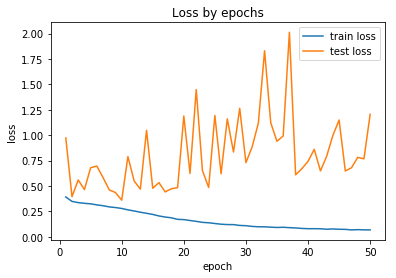

In [0]:
x=np.arange(1,51)
plt.plot(x,history_cnn_subsample.history['loss'],label='train loss')
plt.plot(x,history_cnn_subsample.history['val_loss'], label = 'test loss')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Loss by epochs')

Text(0.5, 1.0, 'Accuracy by epochs')

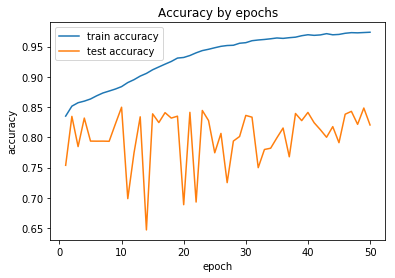

In [0]:
x=np.arange(1,51)
plt.plot(x,history_cnn_subsample.history['acc'],label='train accuracy')
plt.plot(x,history_cnn_subsample.history['val_acc'], label = 'test accuracy')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy by epochs')

### 3.2 Augment the data using rotations, mirroring and possibly other transformations. How much can you improve your original model by data augmentation?

In [0]:
input_shape = (50,50,3)
num_classes = 2
cnn = Sequential()
cnn.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
cnn.add(BatchNormalization())
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Dropout(0.2))
cnn.add(Conv2D(32, (3, 3), activation='relu'))
cnn.add(BatchNormalization())
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Dropout(0.2))
cnn.add(Flatten())
cnn.add(Dense(64, activation='relu'))
cnn.add(Dense(num_classes, activation='softmax'))

cnn.compile("adam", "categorical_crossentropy", metrics=['accuracy'])

In [0]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

datagen2 = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

In [0]:
history_cnn_datagen2 = cnn.fit_generator(datagen2.flow(X_train_sub, y_train_sub, batch_size=128),
                    steps_per_epoch=len(X_train_sub)/32, epochs=20, validation_data=[X_test_sub, y_test_sub])

Instructions for updating:
Use tf.cast instead.
Epoch 1/20


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:699: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:707: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


1431/1430 [==============================] - 128s 90ms/step - loss: 0.3690 - acc: 0.8442 - val_loss: 0.3614 - val_acc: 0.8470
Epoch 2/20
1431/1430 [==============================] - 126s 88ms/step - loss: 0.3417 - acc: 0.8543 - val_loss: 0.4654 - val_acc: 0.8274
Epoch 3/20
1431/1430 [==============================] - 126s 88ms/step - loss: 0.3308 - acc: 0.8589 - val_loss: 0.3374 - val_acc: 0.8609
Epoch 4/20
1431/1430 [==============================] - 126s 88ms/step - loss: 0.3258 - acc: 0.8613 - val_loss: 0.4197 - val_acc: 0.8475
Epoch 5/20
1431/1430 [==============================] - 124s 87ms/step - loss: 0.3219 - acc: 0.8627 - val_loss: 0.8340 - val_acc: 0.7742
Epoch 6/20
1431/1430 [==============================] - 127s 89ms/step - loss: 0.3189 - acc: 0.8644 - val_loss: 0.3524 - val_acc: 0.8578
Epoch 7/20
1431/1430 [==============================] - 123s 86ms/step - loss: 0.3160 - acc: 0.8654 - val_loss: 0.3353 - val_acc: 0.8566
Epoch 8/20
1431/1430 [==============================

In [0]:
score = cnn.evaluate(X_test_sub, y_test_sub, verbose=0)
print("Test loss: {:.3f}".format(score[0]))
print("Test Accuracy: {:.3f}".format(score[1]))

Test loss: 0.387
Test Accuracy: 0.847


Text(0.5, 1.0, 'Loss by epochs')

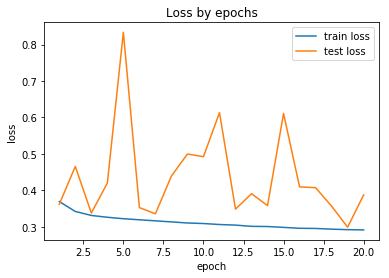

In [0]:
x=np.arange(1,21)
plt.plot(x,history_cnn_datagen2.history['loss'],label='train loss')
plt.plot(x,history_cnn_datagen2.history['val_loss'], label = 'test loss')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Loss by epochs')

Text(0.5, 1.0, 'Accuracy by epochs')

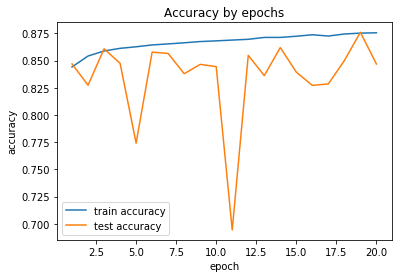

In [0]:
x=np.arange(1,21)
plt.plot(x,history_cnn_datagen2.history['acc'],label='train accuracy')
plt.plot(x,history_cnn_datagen2.history['val_acc'], label = 'test accuracy')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy by epochs')

**Comments: **

**Yes, data augmentation improves accuracy a bit, from 0.82 to 0.84.**




### 3.3 Build a deeper model using residual connections. Show that you can build a deep model that would not be able to learn if you remove the residual connections (i.e. compare a deep model with and without residual connections while the rest of the architecture is constant).

**With residual connection**

In [0]:
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, add
from keras.models import Model

num_classes = 2
inputs = Input(shape=(50, 50, 3))
#next
conv1_1 = Conv2D(32, (3, 3), activation='relu',
                 padding='same')(inputs)
conv1_2 = Conv2D(32, (3, 3), activation='relu',
                 padding='same')(conv1_1)
conv1_3 = Conv2D(32, (3, 3), activation='relu',
                 padding='same')(conv1_2)
maxpool1 = MaxPooling2D(pool_size=(2, 2))(conv1_3)
conv2_1 = Conv2D(32, (3, 3), activation='relu',
                 padding='same')(maxpool1)
conv2_2 = Conv2D(32, (3, 3), activation='relu',
                 padding='same')(conv2_1)
skip1 = add([maxpool1, conv2_2])
conv2_3 = Conv2D(32, (3, 3), activation='relu',
                 padding='same')(skip1)
maxpool2 = MaxPooling2D(pool_size=(2, 2))(conv2_3)

conv3_1 = Conv2D(32, (3, 3), activation='relu',
                 padding='same')(maxpool2)
conv3_2 = Conv2D(32, (3, 3), activation='relu',
                 padding='same')(conv3_1)
conv3_3 = Conv2D(32, (3, 3), activation='relu',
                 padding='same')(conv3_2)
skip2 = add([conv3_1, conv3_3])
maxpool3 = MaxPooling2D(pool_size=(2, 2))(skip2)

conv4_1 = Conv2D(32, (3, 3), activation='relu',
                 padding='same')(maxpool3)
conv4_2 = Conv2D(32, (3, 3), activation='relu',
                 padding='same')(conv4_1)
conv4_3 = Conv2D(32, (3, 3), activation='relu',
                 padding='same')(conv4_2)
skip3 = add([conv4_1, conv4_3])
maxpool4 = MaxPooling2D(pool_size=(2, 2))(skip3)

conv5_1 = Conv2D(32, (3, 3), activation='relu',
                 padding='same')(maxpool4)
conv5_2 = Conv2D(32, (3, 3), activation='relu',
                 padding='same')(conv5_1)
conv5_3 = Conv2D(32, (3, 3), activation='relu',
                 padding='same')(conv5_2)
skip4 = add([conv5_1, conv5_3])
maxpool5 = MaxPooling2D(pool_size=(2, 2))(skip4)

flat = Flatten()(maxpool5)
dense = Dense(64, activation='relu')(flat)
predictions = Dense(num_classes, activation='softmax')(dense)
model_resnet = Model(inputs=inputs, outputs=predictions)

In [0]:
model_resnet.compile(optimizer='adam',loss='categorical_crossentropy',
                     metrics=['accuracy']) 

In [0]:
history_callback_resnet = model_resnet.fit(X_train_sub, y_train_sub, batch_size=256, 
                                    epochs=20, verbose=1, 
                                    validation_data = [X_test_sub, y_test_sub])

Train on 45791 samples, validate on 15264 samples
Epoch 1/20
45791/45791 [==============================] - 20s 445us/step - loss: 0.5364 - acc: 0.7674 - val_loss: 0.3943 - val_acc: 0.8253
Epoch 2/20
45791/45791 [==============================] - 13s 292us/step - loss: 0.3963 - acc: 0.8278 - val_loss: 0.3739 - val_acc: 0.8364
Epoch 3/20
45791/45791 [==============================] - 14s 295us/step - loss: 0.3751 - acc: 0.8367 - val_loss: 0.3689 - val_acc: 0.8434
Epoch 4/20
45791/45791 [==============================] - 14s 295us/step - loss: 0.3609 - acc: 0.8449 - val_loss: 0.3617 - val_acc: 0.8446
Epoch 5/20
45791/45791 [==============================] - 14s 295us/step - loss: 0.3504 - acc: 0.8494 - val_loss: 0.3481 - val_acc: 0.8501
Epoch 6/20
45791/45791 [==============================] - 13s 292us/step - loss: 0.3464 - acc: 0.8502 - val_loss: 0.3358 - val_acc: 0.8568
Epoch 7/20
45791/45791 [==============================] - 13s 289us/step - loss: 0.3354 - acc: 0.8549 - val_loss: 0.

In [0]:
score = model_resnet.evaluate(X_test_sub, y_test_sub, verbose=0)
print("Test loss: {:.3f}".format(score[0]))
print("Test Accuracy: {:.3f}".format(score[1]))

Test loss: 0.374
Test Accuracy: 0.848


Text(0.5, 0, 'epoch')

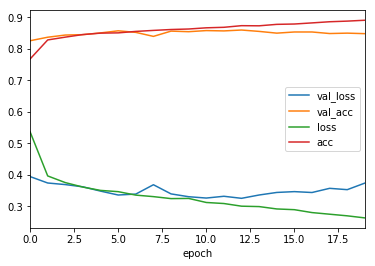

In [0]:
pd.DataFrame(history_callback_resnet.history).plot()
plt.xlabel('epoch')

**Without Residual Connection**

In [0]:
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, add
from keras.models import Model

num_classes = 2
inputs = Input(shape=(50, 50, 3))
#next
conv1_1 = Conv2D(32, (3, 3), activation='relu',
                 padding='same')(inputs)
conv1_2 = Conv2D(32, (3, 3), activation='relu',
                 padding='same')(conv1_1)
conv1_3 = Conv2D(32, (3, 3), activation='relu',
                 padding='same')(conv1_2)
maxpool1 = MaxPooling2D(pool_size=(2, 2))(conv1_3)
conv2_1 = Conv2D(32, (3, 3), activation='relu',
                 padding='same')(maxpool1)
conv2_2 = Conv2D(32, (3, 3), activation='relu',
                 padding='same')(conv2_1)
conv2_3 = Conv2D(32, (3, 3), activation='relu',
                 padding='same')(conv2_2)
maxpool2 = MaxPooling2D(pool_size=(2, 2))(conv2_3)

conv3_1 = Conv2D(32, (3, 3), activation='relu',
                 padding='same')(maxpool2)
conv3_2 = Conv2D(32, (3, 3), activation='relu',
                 padding='same')(conv3_1)
conv3_3 = Conv2D(32, (3, 3), activation='relu',
                 padding='same')(conv3_2)
maxpool3 = MaxPooling2D(pool_size=(2, 2))(conv3_3)

conv4_1 = Conv2D(32, (3, 3), activation='relu',
                 padding='same')(maxpool3)
conv4_2 = Conv2D(32, (3, 3), activation='relu',
                 padding='same')(conv4_1)
conv4_3 = Conv2D(32, (3, 3), activation='relu',
                 padding='same')(conv4_2)
maxpool4 = MaxPooling2D(pool_size=(2, 2))(conv4_3)

conv5_1 = Conv2D(32, (3, 3), activation='relu',
                 padding='same')(maxpool4)
conv5_2 = Conv2D(32, (3, 3), activation='relu',
                 padding='same')(conv5_1)
conv5_3 = Conv2D(32, (3, 3), activation='relu',
                 padding='same')(conv5_2)
maxpool5 = MaxPooling2D(pool_size=(2, 2))(conv5_3)

flat = Flatten()(maxpool5)
dense = Dense(64, activation='relu')(flat)
predictions = Dense(num_classes, activation='softmax')(dense)
model_noresnet = Model(inputs=inputs, outputs=predictions)

In [0]:
model_noresnet.compile(optimizer='adam',loss='categorical_crossentropy',
                     metrics=['accuracy']) 

In [0]:
history_callback_noresnet = model_noresnet.fit(X_train_sub, y_train_sub, batch_size=256, 
                                    epochs=20, verbose=1, 
                                    validation_data = [X_test_sub, y_test_sub])

Train on 45791 samples, validate on 15264 samples
Epoch 1/20
45791/45791 [==============================] - 21s 469us/step - loss: 0.5039 - acc: 0.7578 - val_loss: 0.3937 - val_acc: 0.8252
Epoch 2/20
45791/45791 [==============================] - 14s 304us/step - loss: 0.3948 - acc: 0.8270 - val_loss: 0.3657 - val_acc: 0.8391
Epoch 3/20
45791/45791 [==============================] - 14s 307us/step - loss: 0.3705 - acc: 0.8387 - val_loss: 0.3603 - val_acc: 0.8411
Epoch 4/20
45791/45791 [==============================] - 14s 307us/step - loss: 0.3612 - acc: 0.8437 - val_loss: 0.3851 - val_acc: 0.8362
Epoch 5/20
45791/45791 [==============================] - 14s 310us/step - loss: 0.3592 - acc: 0.8430 - val_loss: 0.3338 - val_acc: 0.8551
Epoch 6/20
45791/45791 [==============================] - 14s 311us/step - loss: 0.3496 - acc: 0.8491 - val_loss: 0.3410 - val_acc: 0.8529
Epoch 7/20
45791/45791 [==============================] - 14s 309us/step - loss: 0.3449 - acc: 0.8522 - val_loss: 0.

In [0]:
score = model_noresnet.evaluate(X_test_sub, y_test_sub, verbose=0)
print("Test loss: {:.3f}".format(score[0]))
print("Test Accuracy: {:.3f}".format(score[1]))

Test loss: 0.313
Test Accuracy: 0.864


Text(0.5, 0, 'epoch')

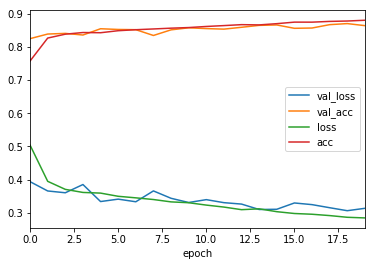

In [0]:
pd.DataFrame(history_callback_noresnet.history).plot()
plt.xlabel('epoch')